<a href="https://colab.research.google.com/github/anjaleeDS/MLCS68/blob/master/HW01_zestimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from vega_datasets import data
import seaborn as sns

In [ ]:
housing_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/housing.csv')

In [ ]:
# Data description available here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt
housing_data.head()

In [ ]:
def dodo(df, indepV):
  modelNum = sm.OLS(indepV,df)
  results = modelNum.fit() # fit the data
  print(results.summary())

In [ ]:
housing_data.shape

(1460, 81)

## look around data

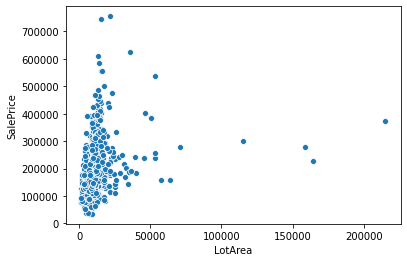

In [ ]:
sns.scatterplot(y='SalePrice', x='LotArea', data=housing_data)

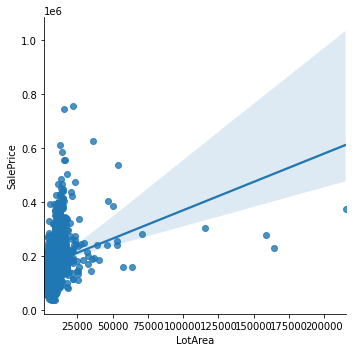

In [ ]:
sns.lmplot(y='SalePrice', x='LotArea', data=housing_data)

## start modeling: pre-filled by lecturer

Sale Price vs LotArea, BedroomAbvGr



```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     70.78
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           4.62e-30
Time:                        19:05:37   Log-Likelihood:                -18476.
No. Observations:                1460   AIC:                         3.696e+04
Df Residuals:                    1457   BIC:                         3.697e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         ```



In [ ]:
y = housing_data['SalePrice']
y

In [ ]:
X = housing_data[['LotArea', 'BedroomAbvGr']]
X.head()

In [ ]:
X = sm.add_constant(X)
X.head()

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     70.78
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           4.62e-30
Time:                        05:47:00   Log-Likelihood:                -18476.
No. Observations:                1460   AIC:                         3.696e+04
Df Residuals:                    1457   BIC:                         3.697e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.215e+05   7368.475     16.493   

In [ ]:
X

,const,LotArea,BedroomAbvGr
0,1.0,8450,3
1,1.0,9600,3
2,1.0,11250,3
3,1.0,9550,3
4,1.0,14260,4
...,...,...,...
1455,1.0,7917,3
1456,1.0,13175,3
1457,1.0,9042,4
1458,1.0,9717,2


## Sale Price vs LotArea,BedroomAbvGr,"Dummy Neighborhood"

### Result: **Adj. R-squared:                  0.586**



```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     80.58
Date:                Sun, 28 Jun 2020   Prob (F-statistic):          3.63e-258
Time:                        00:02:41   Log-Likelihood:                -17886.
No. Observations:                1460   AIC:                         3.583e+04
Df Residuals:                    1433   BIC:                         3.597e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         ```



In [ ]:
housing_data.columns

In [ ]:
# Have fun!!

neigh_dum = pd.get_dummies(housing_data['Neighborhood'])
X_neigh_dum = X.join(neigh_dum)
X_neigh_dum

modelND = sm.OLS(y,X_neigh_dum)
results = modelND.fit() # fit the data

print(results.summary())

## All numerical columns

weird results


```
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.673e+31
Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
Time:                        20:56:50   Log-Likelihood:                          30433.
No. Observations:                1460   AIC:                                 -6.080e+04
Df Residuals:                    1427   BIC:                                 -6.062e+04
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  ```



In [ ]:
# get all columns that are numeric

num_hd_df = housing_data.select_dtypes(include=np.number)
num_hd_df.fillna(0)
num_hd_df = num_hd_df.drop(labels=['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], axis=1)  # DROP THE ONES THAT still have NAs

modelNum = sm.OLS(y,num_hd_df)
results = modelNum.fit() # fit the data
print(results.summary())

### take only the factors with P ~< 0.05 and run model



```
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              5284.
Date:                Sun, 28 Jun 2020   Prob (F-statistic):                        0.00
Time:                        22:08:04   Log-Likelihood:                         -17873.
No. Observations:                1460   AIC:                                  3.575e+04
Df Residuals:                    1456   BIC:                                  3.578e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
```



In [ ]:
# take the factors that have around a lower P < 0.05 and higher T values (away from 0)

top_hd_df = num_hd_df[['MSSubClass','OverallQual', 'MiscVal', 'LotArea']]


modelTop = sm.OLS(y,top_hd_df)
results = modelTop.fit() # fit the data
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              5284.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):                        0.00
Time:                        03:40:20   Log-Likelihood:                         -17873.
No. Observations:                1460   AIC:                                  3.575e+04
Df Residuals:                    1456   BIC:                                  3.578e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
housing_data.Fireplaces.value_counts()
# housing_data.YearRemodAdd.isna()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

## Best numerical combo



```
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              3729.
Date:                Tue, 30 Jun 2020   Prob (F-statistic):                        0.00
Time:                        04:33:05   Log-Likelihood:                         -17409.
No. Observations:                1460   AIC:                                  3.484e+04
Df Residuals:                    1449   BIC:                                  3.490e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
```



In [ ]:
# trying out best numeric combo

y = housing_data['SalePrice']
best_combo = housing_data[['LotArea','OverallQual','TotalBsmtSF','TotRmsAbvGrd',
                           'GarageArea','MasVnrArea','YearRemodAdd','BsmtFinSF1', 'YrSold', 
                           'GrLivArea','KitchenAbvGr']]
best_combo= best_combo.fillna(0, axis=1)
# best_combo.isna().sum(axis=1).tolist()

dodo(best_combo,y)


                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              3729.
Date:                Wed, 01 Jul 2020   Prob (F-statistic):                        0.00
Time:                        06:05:22   Log-Likelihood:                         -17409.
No. Observations:                1460   AIC:                                  3.484e+04
Df Residuals:                    1449   BIC:                                  3.490e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

## splice by SaleCondition - adj r2 =  0.793

- make dummy vars for SaleCondition
- use the minimal numerical vars 

-- splice by SaleCondition

```
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
```



```
                           OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     351.3
Date:                Wed, 01 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:06:19   Log-Likelihood:                -17385.
No. Observations:                1460   AIC:                         3.480e+04
Df Residuals:                    1443   BIC:                         3.489e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
```



In [ ]:
# sale condition dummy with best combo (numerics) matrix

saleCond_dum = pd.get_dummies(housing_data['SaleCondition'])
bestcombo_saleCond_dum = best_combo.join(saleCond_dum)
bestcombo_saleCond_dum

,LotArea,OverallQual,TotalBsmtSF,TotRmsAbvGrd,GarageArea,MasVnrArea,YearRemodAdd,BsmtFinSF1,YrSold,GrLivArea,KitchenAbvGr,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,8450,7,856,8,548,196.0,2003,706,2008,1710,1,0,0,0,0,1,0
1,9600,6,1262,6,460,0.0,1976,978,2007,1262,1,0,0,0,0,1,0
2,11250,7,920,6,608,162.0,2002,486,2008,1786,1,0,0,0,0,1,0
3,9550,7,756,7,642,0.0,1970,216,2006,1717,1,1,0,0,0,0,0
4,14260,8,1145,9,836,350.0,2000,655,2008,2198,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,953,7,460,0.0,2000,0,2007,1647,1,0,0,0,0,1,0
1456,13175,6,1542,7,500,119.0,1988,790,2010,2073,1,0,0,0,0,1,0
1457,9042,7,1152,9,252,0.0,2006,275,2010,2340,1,0,0,0,0,1,0
1458,9717,5,1078,5,240,0.0,1996,49,2010,1078,1,0,0,0,0,1,0


In [ ]:
dodo(bestcombo_saleCond_dum, y)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     351.3
Date:                Wed, 01 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:06:19   Log-Likelihood:                -17385.
No. Observations:                1460   AIC:                         3.480e+04
Df Residuals:                    1443   BIC:                         3.489e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
LotArea          0.5516      0.102      5.432   

## splice by MSSubClass adjr2 = 0.795

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     226.7
Date:                Wed, 01 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:43:27   Log-Likelihood:                -17376.
No. Observations:                1460   AIC:                         3.480e+04
Df Residuals:                    1434   BIC:                         3.494e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
```


### counts/information

```
TYPE   COUNT
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
```
1. try without parsing Type by 1946 and newer houses and 1945 and older
2. parse Type by 1946 and newer houses and 1945 and older

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [ ]:
# MSSubClass dummy with best combo (numerics) matrix

MSSC_dum = pd.get_dummies(housing_data['MSSubClass'])
bestcombo_MSSC_dum = best_combo.join(MSSC_dum)
bestcombo_MSSC_dum

,LotArea,OverallQual,TotalBsmtSF,TotRmsAbvGrd,GarageArea,MasVnrArea,YearRemodAdd,BsmtFinSF1,YrSold,GrLivArea,KitchenAbvGr,20,30,40,45,50,60,70,75,80,85,90,120,160,180,190
0,8450,7,856,8,548,196.0,2003,706,2008,1710,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,9600,6,1262,6,460,0.0,1976,978,2007,1262,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11250,7,920,6,608,162.0,2002,486,2008,1786,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,9550,7,756,7,642,0.0,1970,216,2006,1717,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,14260,8,1145,9,836,350.0,2000,655,2008,2198,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,953,7,460,0.0,2000,0,2007,1647,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1456,13175,6,1542,7,500,119.0,1988,790,2010,2073,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1457,9042,7,1152,9,252,0.0,2006,275,2010,2340,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1458,9717,5,1078,5,240,0.0,1996,49,2010,1078,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dodo(bestcombo_MSSC_dum, y)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     226.7
Date:                Wed, 01 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:43:27   Log-Likelihood:                -17376.
No. Observations:                1460   AIC:                         3.480e+04
Df Residuals:                    1434   BIC:                         3.494e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
LotArea          0.4718      0.103      4.559   


## MSZoning for Residential v Non-res adj r2 = 0.791

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     368.7
Date:                Wed, 01 Jul 2020   Prob (F-statistic):               0.00
Time:                        06:19:38   Log-Likelihood:                -17394.
No. Observations:                1460   AIC:                         3.482e+04
Df Residuals:                    1444   BIC:                         3.491e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
```



### counts

```
Type       Count
RL         1151
RM          218
FV           65
RH           16
C (all)      10
```

In [ ]:
# MSZoning dummy with best combo (numerics) matrix

MSZ_dum = pd.get_dummies(housing_data['MSZoning'])
bestcombo_MSZ_dum = best_combo.join(MSZ_dum)
bestcombo_MSZ_dum

,LotArea,OverallQual,TotalBsmtSF,TotRmsAbvGrd,GarageArea,MasVnrArea,YearRemodAdd,BsmtFinSF1,YrSold,GrLivArea,KitchenAbvGr,C (all),FV,RH,RL,RM
0,8450,7,856,8,548,196.0,2003,706,2008,1710,1,0,0,0,1,0
1,9600,6,1262,6,460,0.0,1976,978,2007,1262,1,0,0,0,1,0
2,11250,7,920,6,608,162.0,2002,486,2008,1786,1,0,0,0,1,0
3,9550,7,756,7,642,0.0,1970,216,2006,1717,1,0,0,0,1,0
4,14260,8,1145,9,836,350.0,2000,655,2008,2198,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,953,7,460,0.0,2000,0,2007,1647,1,0,0,0,1,0
1456,13175,6,1542,7,500,119.0,1988,790,2010,2073,1,0,0,0,1,0
1457,9042,7,1152,9,252,0.0,2006,275,2010,2340,1,0,0,0,1,0
1458,9717,5,1078,5,240,0.0,1996,49,2010,1078,1,0,0,0,1,0


In [ ]:
dodo(bestcombo_MSZ_dum, y)

## non-numeric factors



In [ ]:
# ExterQual and ExterCond dummy without best combo (numerics) matrix

Ext_dum = pd.get_dummies(housing_data[['ExterQual', 'ExterCond']])
dodo(Ext_dum,y)
# bestcombo_Ext_dum = best_combo.join(Ext_dum)
# bestcombo_Ext_dum

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.479
```

In [ ]:
# ExterQual and ExterCond dummy with best combo (numerics) matrix

bestcombo_Ext_dum = best_combo.join(Ext_dum)
dodo(bestcombo_Ext_dum,y)

```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
```

## Take the numerical factors that are thought to bring significance in a sale price

Running list

4. ExterQual(non-numeric)
5. ExterCond(non-numeric)
6. BsmtQual (non-numeric)
7. BsmtCond (non-numeric)
9. Total number of bathrooms (calc = 
FullBath + HalfBath + BsmtFullBath + BsmtHalfBath)
12. GarageCond (non-numeric)
